In [1]:
import torch
import numpy as np

In [2]:
from torchvision import datasets, transforms
import torch.nn.functional as F

In [3]:
num_workers= 0
batch_size = 64


In [4]:
transform= transforms.ToTensor()

In [6]:
train_data=datasets.MNIST(root='data', download=True, train= True, transform= transform)
test_data=datasets.MNIST(root='data', download=True, train= False, transform= transform)

In [7]:
train_loader= torch.utils.data.DataLoader(train_data,batch_size=batch_size,num_workers=num_workers)
test_loader= torch.utils.data.DataLoader(test_data,batch_size=batch_size,num_workers=num_workers)

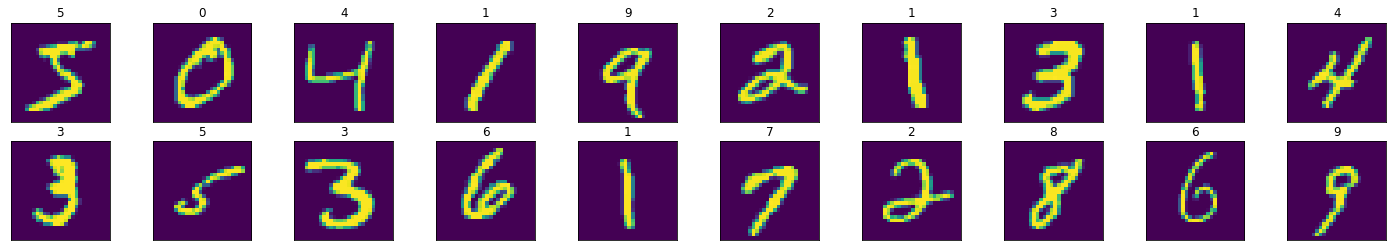

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels= next(iter(train_loader))
images= images.numpy()

fig= plt.figure(figsize=(25,4))

for idx in np.arange(20):
    ax=fig.add_subplot(2,20/2,idx+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(images[idx]))
    ax.set_title(str(labels[idx].item()))

In [22]:
import torch.nn as nn


class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        
        self.conv1 = nn.Conv2d(1,32,3,stride=1,padding=1)
        self.conv2 = nn.Conv2d(32,64,3,stride=1,padding=1)
        
        
        self.pool= nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(3136,128)
        self.fc2 = nn.Linear(128,10)
        
        self.dropout= nn.Dropout(0.5)
        
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.reshape(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        
        return x
        

In [23]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [24]:
import torch.optim as optim


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [28]:
epochs= 20

for epoch in range(epochs):
    train_loss= 0.0
    
    for data,target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
        
        train_loss+= loss.item() 
        
    train_loss= train_loss/len(train_loader)

    
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.013468
Epoch: 2 	Training Loss: 0.013665
Epoch: 3 	Training Loss: 0.012462
Epoch: 4 	Training Loss: 0.011339
Epoch: 5 	Training Loss: 0.011098
Epoch: 6 	Training Loss: 0.010702
Epoch: 7 	Training Loss: 0.010819
Epoch: 8 	Training Loss: 0.009984
Epoch: 9 	Training Loss: 0.009979
Epoch: 10 	Training Loss: 0.010887
Epoch: 11 	Training Loss: 0.009254
Epoch: 12 	Training Loss: 0.009909
Epoch: 13 	Training Loss: 0.009041
Epoch: 14 	Training Loss: 0.009505
Epoch: 15 	Training Loss: 0.008295
Epoch: 16 	Training Loss: 0.007273
Epoch: 17 	Training Loss: 0.008781
Epoch: 18 	Training Loss: 0.008729
Epoch: 19 	Training Loss: 0.006532
Epoch: 20 	Training Loss: 0.009381


In [29]:
test_loss=0.0
class_correct=list(0. for i in range(10))
class_total= list(0. for i in range(10))


model.eval()


for data, target in test_loader:
    output=model(data)
    loss=criterion(output,target)
    test_loss= loss.item() * data.size(0)
    
    _,pred= torch.max(output,1)
    correct=np.squeeze(pred.eq(target.data.view_as(pred)))
    for i in range(len(target)):
        label=target.data[i]
        
        class_correct[label]+=correct[i].item()
        class_total[label]+=1
        
test_loss = test_loss/len(test_loader)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.000000

Test Accuracy of     0: 99% (978/980)
Test Accuracy of     1: 99% (1132/1135)
Test Accuracy of     2: 98% (1018/1032)
Test Accuracy of     3: 99% (1008/1010)
Test Accuracy of     4: 99% (976/982)
Test Accuracy of     5: 98% (883/892)
Test Accuracy of     6: 99% (949/958)
Test Accuracy of     7: 99% (1022/1028)
Test Accuracy of     8: 98% (964/974)
Test Accuracy of     9: 97% (988/1009)

Test Accuracy (Overall): 99% (9918/10000)


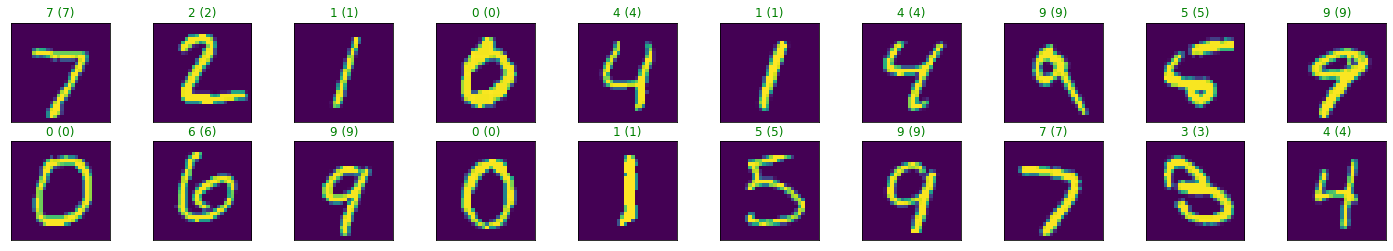

In [31]:
images,labels= next(iter(test_loader))
output=model(images)
_,preds=torch.max(output,1)
images= images.numpy()


fig=plt.figure(figsize=[25,4])
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]))
    ax.set_title("{} ({})".format(str(preds[idx].item()),str(labels[idx].item())),
                color=("green" if preds[idx]==labels[idx] else "red"))
